In [273]:
# Daniyal Rahim                                        D07605                                                DS-HW8

In [234]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
df = pd.read_csv("EmployeeSalaryRegression.csv");

In [236]:
                                        # Question 1
# Create a regression model between TotalWorkingYears and MonthlyIncome
# (response variable). Show the scatter plot with regression line between them.

In [237]:
Y = df["MonthlyIncome"] # we can consider Monthly income as output because usually your working expereince haev impact on Monthly Income
X =  sm.add_constant(df["TotalWorkingYears"])
model = sm.OLS(Y,X).fit()
model.summary()

### Interpretation of the above result
# Y (prediction) = Monthly Income
# X (input) = Total Working Years
# For each additional working year at a company the Monthly Income increase by 467.6584 units.
# Our P value is less than 0.05 therefore one can be assured that input has significant impact on prediction. 
# Our R squared tell us how much variance in dependent varaible can be predicted from independent variable using
# the current results. Since our R square value is around 0.6 therefore we can be somewhat sure while predicting the 
# variance of dependent variable from independent variable. 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     2178.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):          2.73e-292
Time:                        22:51:46   Log-Likelihood:                -13848.
No. Observations:                1470   AIC:                         2.770e+04
Df Residuals:                    1468   BIC:                         2.771e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1227.9353    137.299      8.944      0.000     958.612    1497.259
TotalWorkingYears   467.6584     10.021     46.669      0.000     448.002     487.315
==============================================================================
Omnibus:                       47.473   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.304
Skew:                           0.269   Prob(JB):                     6.02e-18
Kurtosis:                       4.003   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [238]:
plt.plot(df['TotalWorkingYears'].values, df['MonthlyIncome'].values,'ro')
plt.plot(df['TotalWorkingYears'].values ,model.fittedvalues.values,  'b')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('TotalWorkingYears')
plt.ylabel('MonthlyIncome')

# We can see that on increase in TotalWorkingYears, Monthly income is also increasing. Hence, the regression line is growing linearly.

Text(0, 0.5, 'MonthlyIncome')

In [239]:
                                        # Question 2
# Create a regression model between Age and DistanceFromHome (response variable).
# Show the scatter plot with regression line between them.

In [240]:
Y = df["DistanceFromHome"]
X = sm.add_constant(df["Age"])
model = sm.OLS(Y,X).fit()
model.summary()

### Interpretation of the above result
# Y (prediction) = DistanceFromHome
# X (input) = Age
# Our P value is greater than 0.05 therefore our input has significant no impact on prediction. 
# Our R squared tell us how much variance in dependent varaible can be predicted from independent variable using
# the current results. Since our R square value is around 0 therefore we can not predict the 
# variance of dependent variable from independent variable.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       DistanceFromHome   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.004174
Date:                Mon, 30 Oct 2023   Prob (F-statistic):              0.948
Time:                        22:51:47   Log-Likelihood:                -5161.6
No. Observations:                1470   AIC:                         1.033e+04
Df Residuals:                    1468   BIC:                         1.034e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2478      0.881     10.497      0.000       7.520      10.976
Age           -0.0015      0.023     -0.065      0.948      -0.047       0.044
==============================================================================
Omnibus:                      168.749   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.762
Skew:                           0.957   Prob(JB):                     3.48e-50
Kurtosis:                       2.773   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'DistanceFromHome')

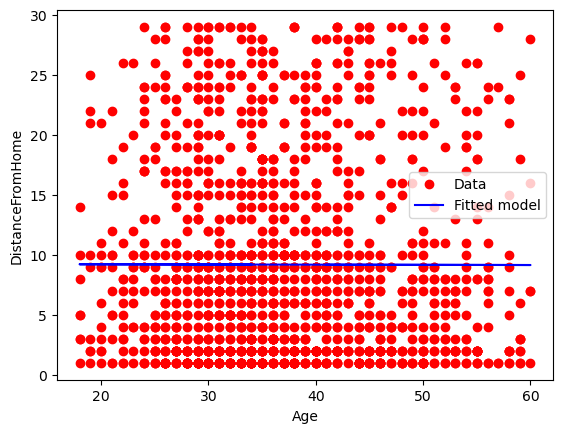

In [241]:
plt.plot(df['Age'].values, df['DistanceFromHome'].values,'ro')
plt.plot(df['Age'].values ,model.fittedvalues.values,  'b')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('Age')
plt.ylabel('DistanceFromHome')

# We cannot predict any thing from the regression model as there is not relation between Age and Distance From Home. Since our P value is much
# greater than the 0.05. 

In [242]:
                                        # Question 3
# Calculate Correlation for (1) and (2) and explain the values to support your answer.

In [243]:
# (1)
df['TotalWorkingYears'].corr(df['MonthlyIncome'])

0.7728932462543562

In [244]:
# (2)
df['Age'].corr(df['DistanceFromHome'])

-0.0016861201480870226

In [245]:
# Answer:
# (1) Correlation = root(R-squared) = root(0.597) = 0.773 > 0. it means that variables have positive correlation between them. Increase in TotalWorkingYears 
# causes increase in the MonthlyIncome. One can also notice this, by seeing the linear regression line (with positive slope) which symbolizes 
# positive relation between two variable. 

# (2) Correlation = root(R-squared) = 0. it means that both variable has no correlation between them. the increase and decrease in one variable
# causes no change in the other. One can also notice this by seeing the flat straight regression line (with slope 0) which symbolizes no relation between two variables. 

In [246]:
                                        # Question 4
# Create a regression model to predict MonthlyIncome using all other inputs. Discuss
# the effectiveness of the model. Report 3 most significant inputs and 3 least significant
# inputs (based on p-value) and interpret the results. Create a new input and show the
# prediction of MonthlyIncome using the same model.

In [247]:
one_hot = pd.get_dummies(df, columns = ['Department', 'JobRole','EducationField', 'Gender','MaritalStatus','OverTime'], dtype=int)

In [248]:
X = one_hot.drop(['MonthlyIncome'], axis = 1)
Y = one_hot["MonthlyIncome"]

In [249]:
X = sm.add_constant(X)

In [250]:
modelcat = sm.OLS(Y,X).fit()

In [251]:
modelcat.summary()

# This model contains the mix of various inputs. We have also encoperated categorical inputs by one hot encoding method. This will help us to completely use our data set to accurately
# predict values for new employees. 

# 3 Most significant inputs can be JobLevel, TotalWorkingYears, YearsWithCurrManager having p value 0, 0 and 0.013 respectively.
# It means that on increase in Joblevel one level higher will increase Monthly Income of employee by mean of 2759.6363 units. 
# On each year spent with company, Monthly Income will increase by 48.0088 units.
# And on additional year with Current Manager the monthly salary will decrease by 34.1053 units. Therefore it can be advantageious to work under different managers.

# 3 least significant inputs can be Education, YearsInCurrentRole, PerformanceRating having p values 0.708,0.925 and 0.717 respectively.
# Therefore we can be assured that increase or decrease in these values will have no significant impact on an Employees Monthly Income.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     715.9
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:51:48   Log-Likelihood:                -12394.
No. Observations:                1470   AIC:                         2.486e+04
Df Residuals:                    1435   BIC:                         2.504e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               364.2019    129.213      2.819      0.005     110.735     617.669
Age                                  -5.3357      4.614     -1.156      0.248     -14.386       3.715
DistanceFromHome                     -4.8212      3.650     -1.321      0.187     -11.981       2.339
Education                           -11.1578     29.743     -0.375      0.708     -69.502      47.186
HourlyRate                            1.3410      1.454      0.923      0.356      -1.511       4.193
JobLevel                           2759.6363     67.718     40.752      0.000    2626.800    2892.473
NumCompaniesWorked                   11.5087     13.246      0.869      0.385     -14.475      37.493
PerformanceRating                   -29.6861     81.840     -0.363      0.717    -190.225     130.853
StockOptionLevel                    -42.3557     47.499     -0.892      0.373    -135.530      50.818
TotalWorkingYears                    48.0088      8.316      5.773      0.000      31.696      64.321
TrainingTimesLastYear               -16.7479     23.135     -0.724      0.469     -62.130      28.634
WorkLifeBalance                     -22.7978     42.025     -0.542      0.588    -105.235      59.640
YearsAtCompany                        6.6563     10.392      0.641      0.522     -13.729      27.041
YearsInCurrentRole                    1.2712     13.482      0.094      0.925     -25.175      27.717
YearsSinceLastPromotion              23.3883     11.880      1.969      0.049       0.084      46.693
YearsWithCurrManager                -34.1053     13.789     -2.473      0.013     -61.154      -7.057
Department_Human Resources            9.7448    276.725      0.035      0.972    -533.084     552.574
Department_Research & Development   257.1010    170.358      1.509      0.131     -77.077     591.279
Department_Sales                     97.3561    186.808      0.521      0.602    -269.090     463.802
JobRole_Healthcare Representative  -688.0551    132.450     -5.195      0.000    -947.872    -428.239
JobRole_Human Resources            -768.8603    352.072     -2.184      0.029   -1459.491     -78.229
JobRole_Laboratory Technician     -1272.3236    127.561     -9.974      0.000   -1522.549   -1022.098
JobRole_Manager                    3485.3481    158.766     21.953      0.000    3173.910    3796.786
JobRole_Manufacturing Director     -748.5922    130.143     -5.752      0.000   -1003.882    -493.302
JobRole_Research Director          3366.6822    178.825     18.827      0.000    3015.896    3717.469
JobRole_Research Scientist        -1187.9080    127.234     -9.336      0.000   -1437.492    -938.324
JobRole_Sales Executive            -601.3083    185.266     -3.246      0.001    -964.730    -237.887
JobRole_Sales Represent

In [252]:
df_new = df_new = pd.DataFrame({
    'const': [300],
    'Age': [55],
    'DistanceFromHome': [3],
    'Education': [4],
    'HourlyRate': [2],
    'JobLevel': [4],
    'NumCompaniesWorked': [10],
    'PerformanceRating': [1],
    'StockOptionLevel': [0],
    'TotalWorkingYears': [45],
    'TrainingTimesLastYear': [1],
    'WorkLifeBalance': [3],
    'YearsAtCompany': [7],
    'YearsInCurrentRole': [3],
    'YearsSinceLastPromotion': [1],
    'YearsWithCurrManager': [5],
    'Department_Human Resources': [0],
    'Department_Research & Development': [1],
    'Department_Sales': [0],
    'JobRole_Healthcare Representative': [0],
    'JobRole_Human Resources': [0],
    'JobRole_Laboratory Technician': [0],
    'JobRole_Manager': [0],
    'JobRole_Manufacturing Director': [0],
    'JobRole_Research Director': [1],
    'JobRole_Research Scientist': [0],
    'JobRole_Sales Executive': [0],
    'JobRole_Sales Representative': [0],
    'EducationField_Human Resources': [0],
    'EducationField_Life Sciences': [1],
    'EducationField_Marketing': [0],
    'EducationField_Medical': [0],
    'EducationField_Other': [0],
    'EducationField_Technical Degree': [0],
    'Gender_Female': [0],
    'Gender_Male': [1],
    'MaritalStatus_Divorced': [0],
    'MaritalStatus_Married': [1],
    'MaritalStatus_Single': [0],
    'OverTime_No': [1],
    'OverTime_Yes': [0]
})

In [253]:
#predicting Monthly Income for new data
modelcat.predict(df_new)

# According to our Prediction Model, For the new Employee the predicted Monthly Income is 126208.614331 units. This can be a very good candidate.

0    126208.614331
dtype: float64

In [254]:
modelcat.predict(df_new)

0    126208.614331
dtype: float64

In [255]:
                                        # Question 5
#  Create a regression model to predict HourlyRate using all other inputs. Discuss the
# effectiveness of the model. Report 3 most significant inputs and 3 least significant
# inputs (based on p-value) and interpret the results. Create a new input and show the
# prediction of HourlyRate using the same model.

In [256]:
one_hot = pd.get_dummies(df, columns = ['Department', 'JobRole','EducationField', 'Gender','MaritalStatus','OverTime'], dtype=int)

In [257]:
X = one_hot.drop(['HourlyRate'], axis = 1)
Y = one_hot["HourlyRate"]

In [258]:
X = sm.add_constant(X)

In [259]:
modelcat = sm.OLS(Y,X).fit()

In [260]:
modelcat.summary()

# This model contains the mix of various inputs. We have also encoperated categorical inputs by one hot encoding method. This will help us to completely use our data set to accurately
# predict values for new employees. 

# 3 Most significant inputs can be categorical inputs like Gender, Marital Status, OverTime having p value 0, 0 and 0 respectively.
# It means that change in these values will cause significant change in our predicted value. Hence we can use these inputs to make a standalone prediction model.

# 3 least significant inputs can be TrainingTimesLastYear, WorkLifeBalance, YearsWithCurrManager having p values 0.844, 0.881 and 0.972 respectively.
# Therefore we can be assured that increase or decrease in these values will have no significant impact on an Employee's Hourly Rate. We can also remove these columns if we want.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             HourlyRate   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6846
Date:                Mon, 30 Oct 2023   Prob (F-statistic):              0.916
Time:                        22:51:48   Log-Likelihood:                -6501.3
No. Observations:                1470   AIC:                         1.307e+04
Df Residuals:                    1435   BIC:                         1.326e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                21.8033      2.281      9.560      0.000      17.329      26.277
Age                                   0.0632      0.084      0.754      0.451      -0.101       0.228
DistanceFromHome                      0.0797      0.066      1.203      0.229      -0.050       0.210
Education                             0.2087      0.540      0.386      0.699      -0.851       1.268
JobLevel                             -3.1841      1.804     -1.765      0.078      -6.722       0.354
NumCompaniesWorked                    0.1083      0.241      0.450      0.653      -0.364       0.580
PerformanceRating                    -0.3151      1.486     -0.212      0.832      -3.230       2.599
StockOptionLevel                      1.4108      0.862      1.637      0.102      -0.280       3.101
TotalWorkingYears                     0.0492      0.153      0.322      0.747      -0.250       0.349
TrainingTimesLastYear                -0.0827      0.420     -0.197      0.844      -0.907       0.741
WorkLifeBalance                       0.1144      0.763      0.150      0.881      -1.382       1.611
YearsAtCompany                        0.0478      0.189      0.253      0.800      -0.322       0.418
YearsInCurrentRole                   -0.1133      0.245     -0.463      0.643      -0.593       0.367
YearsSinceLastPromotion              -0.1686      0.216     -0.781      0.435      -0.592       0.255
YearsWithCurrManager                 -0.0090      0.251     -0.036      0.972      -0.501       0.483
MonthlyIncome                         0.0004      0.000      0.923      0.356      -0.000       0.001
Department_Human Resources            7.7458      5.020      1.543      0.123      -2.101      17.592
Department_Research & Development     6.3040      3.091      2.040      0.042       0.241      12.367
Department_Sales                      7.7535      3.386      2.290      0.022       1.112      14.395
JobRole_Healthcare Representative     4.4668      2.424      1.843      0.066      -0.289       9.222
JobRole_Human Resources               1.7867      6.402      0.279      0.780     -10.772      14.345
JobRole_Laboratory Technician         2.8286      2.394      1.182      0.238      -1.867       7.524
JobRole_Manager                       5.0691      3.329      1.523      0.128      -1.460      11.599
JobRole_Manufacturing Director        2.7039      2.389      1.132      0.258      -1.982       7.390
JobRole_Research Director             1.8802      3.625      0.519      0.604      -5.231       8.991
JobRole_Research Scientist            2.6847      2.378      1.129      0.259      -1.980       7.349
JobRole_Sales Executive               1.3700      3.376      0.406      0.685      -5.251       7.992
JobRole_Sales Represent

In [261]:
df_new = df_new = pd.DataFrame({
    'const': [300],
    'Age': [55],
    'DistanceFromHome': [3],
    'Education': [4],
    'HourlyRate': [2],
    'JobLevel': [4],
    'NumCompaniesWorked': [10],
    'PerformanceRating': [1],
    'StockOptionLevel': [0],
    'TotalWorkingYears': [45],
    'TrainingTimesLastYear': [1],
    'WorkLifeBalance': [3],
    'YearsAtCompany': [7],
    'YearsInCurrentRole': [3],
    'YearsSinceLastPromotion': [1],
    'YearsWithCurrManager': [5],
    'Department_Human Resources': [0],
    'Department_Research & Development': [1],
    'Department_Sales': [0],
    'JobRole_Healthcare Representative': [0],
    'JobRole_Human Resources': [0],
    'JobRole_Laboratory Technician': [0],
    'JobRole_Manager': [0],
    'JobRole_Manufacturing Director': [0],
    'JobRole_Research Director': [1],
    'JobRole_Research Scientist': [0],
    'JobRole_Sales Executive': [0],
    'JobRole_Sales Representative': [0],
    'EducationField_Human Resources': [0],
    'EducationField_Life Sciences': [1],
    'EducationField_Marketing': [0],
    'EducationField_Medical': [0],
    'EducationField_Other': [0],
    'EducationField_Technical Degree': [0],
    'Gender_Female': [0],
    'Gender_Male': [1],
    'MaritalStatus_Divorced': [0],
    'MaritalStatus_Married': [1],
    'MaritalStatus_Single': [0],
    'OverTime_No': [1],
    'OverTime_Yes': [0]
})

In [262]:
#predicting Hourly Rate for new data
modelcat.predict(df_new)

# According to our Prediction Model, For the new Employee the predicted Hourly Rate is 6577.167154 units. This can be a very good candidate.

0    6577.167154
dtype: float64

In [263]:
                                        # Question 6

# Select only top 3 inputs (based on p-value) from (Question 4) and create a new model
# to predict MonthlyIncome. (If you are picking a categorical column for one of your
# top 3 columns, lets say JobRole, then make sure to add all the one hot encoded
# columns for JobRole and it will be counted as one top input). Discuss the
# performance of the model using few inputs as compared to using all inputs in
# (Question 4). Which model do you prefer and why?

In [264]:
X = df[['JobLevel', 'TotalWorkingYears', 'YearsWithCurrManager']]
Y = df["MonthlyIncome"]

In [265]:
modelcat = sm.OLS(Y,sm.add_constant(X)).fit()

In [266]:
modelcat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     4717.
Date:                Mon, 30 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:51:48   Log-Likelihood:                -12778.
No. Observations:                1470   AIC:                         2.556e+04
Df Residuals:                    1466   BIC:                         2.559e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1766.8073     82.056    -21.532      0.000   -1927.767   -1605.848
JobLevel              3794.0089     54.651     69.422      0.000    3686.806    3901.212
TotalWorkingYears       54.3232      8.113      6.696      0.000      38.410      70.237
YearsWithCurrManager   -42.1118     11.891     -3.542      0.000     -65.436     -18.787
==============================================================================
Omnibus:                       10.561   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.756
Skew:                          -0.033   Prob(JB):                     0.000625
Kurtosis:                       3.486   Cond. No.                         34.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [267]:
# We can see that this model is more precise as the few inputs that we have provided are all relevant to the this model. THe previous model with all the
# inputs was too good to be true, as it has a wide range of input varietes. Our new model is exact and can more accuratately predict the values for new entries.
# "Regularization in Regression” is a method by which we can remove maximum variance in the results by dropping out the unnecessary and noisy inputs.  

In [268]:
                                                # Question 7
# . Using the model with 3 inputs in Question 6, create 2 new data records and predict
# their MonthlyIncome. Discuss if the predicted output makes sense based on your new
# data records.

In [269]:
df_1 = pd.DataFrame({
    'const' : [1.0],
    'JobLevel': [3],
    'TotalWorkingYears': [2],
    'YearsWithCurrManager': [3]
})

modelcat.predict(df_1)

0    9597.530349
dtype: float64

In [270]:
# The output predicted by the model makes sense because the person has moderate Job lvl with total two years of working experience and 3 years of working
# with current manager. Hence this employee gets a good amount of Monthly Income. 

In [271]:
df_2 = pd.DataFrame({
    'const': [1.0],
    'JobLevel': [5],
    'TotalWorkingYears': [5],
    'YearsWithCurrManager': [1]
})

modelcat.predict(df_2)

0    17432.741257
dtype: float64

In [272]:
# This output when compared with the above input perfectly reflects the accuracy of prediction. As the Job lvl and Total working years are higher
# than the previous input therefore then predicted monthly income is also greater. Moreover, as the 'YearsWithCurrManager' increase the monthly income 
# tends to decrease therefore this input has lesser number of years with current manager. Hence we can see that multiple factors are causing the monthly
# income of an employee to increase. 